### **Exploratory Data Analysis**

In this workbook, we will discover some fundamental EDA techniques for text data:
- Distribution Plots
- xxx
- xxx

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
import unicodedata
import collections

from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.util import ngrams
from wordcloud import WordCloud

In [2]:
df_processed_full = pd.read_excel("amazon_review_processed_full.xlsx")
df_processed_full.head(5)

,Review Model,Retailer,Review date,Review name,Review rating,Review title,Review Content,Verified Purchase or not,People_find_helpful,vine or not,...,title_word_count,content_char_count,title_char_count,content_avg_word,title_avg_word,content_stopwords,title_stopwords,Brand,Full review,ID
0,Canon Pixma TS6420a,Amazon,2023-08-10,Ernest Birkholz,5,works great,easy install works great,True,0.0,False,...,2,38,11,3.875000,5.000000,3,0,Canon,works great easy install works great,1
1,HP OfficeJet Pro 9015e,Amazon,2022-06-04,mattey,3,spunky mid size,slower speed im used old model 8600 new 9015e ...,True,0.0,False,...,4,460,23,4.835443,5.000000,19,0,HP,spunky mid size slower speed im used old model...,2
2,Canon PIXMA MG3620,Amazon,2023-03-15,Maria D,4,NaN,i,True,0.0,False,...,2,7,12,3.000000,5.500000,0,0,Canon,i,3
3,Epson - ET-3830,Amazon,2022-11-17,Ryan H,5,shag knows hes talking,yup slam upgrade paid little front equivalent ...,True,12.0,False,...,6,469,34,4.595238,4.833333,31,2,Epson,shag knows hes talking yup slam upgrade paid l...,4
4,HP ENVY 6055e,Amazon,2022-04-09,Sam,3,user friendly,would think something simple reconnecting wifi...,True,0.0,False,...,3,861,17,4.387500,5.000000,71,0,HP,user friendly would think something simple rec...,5


In [3]:
df_processed_full.describe()

,Review rating,People_find_helpful,list price,rating count,overall rating,content_word_count,title_word_count,content_char_count,title_char_count,content_avg_word,title_avg_word,content_stopwords,title_stopwords,ID
count,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000,10209.000000
mean,3.084729,4.683612,201.352083,11595.403076,4.161926,85.707807,5.045254,455.495543,27.783916,4.420507,5.049198,34.220492,1.247527,5105.000000
std,1.587869,23.275835,108.597911,17373.701014,0.099770,102.562293,3.567902,554.850041,19.129711,0.581190,1.610166,42.824573,1.632038,2947.228783
min,1.000000,0.000000,79.990000,285.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,129.990000,1896.000000,4.100000,24.000000,2.000000,126.000000,14.000000,4.111111,4.000000,8.000000,0.000000,2553.000000
50%,3.000000,0.000000,159.990000,4338.000000,4.100000,54.000000,4.000000,285.000000,23.000000,4.365854,4.750000,21.000000,1.000000,5105.000000
75%,5.000000,3.000000,239.990000,9872.000000,4.200000,109.000000,7.000000,574.000000,36.000000,4.642857,5.750000,44.000000,2.000000,7657.000000
max,5.000000,990.000000,549.990000,53646.000000,4.400000,1439.000000,25.000000,8042.000000,127.000000,10.000000,22.000000,597.000000,12.000000,10209.000000


In [4]:
df_processed_full['Review Model'] = df_processed_full['Review Model'].astype(str)
df_processed_full['Retailer'] = df_processed_full['Retailer'].astype(str)
df_processed_full['Review title'] = df_processed_full['Review title'].astype(str)
df_processed_full['Review Content'] = df_processed_full['Review Content'].astype(str)
df_processed_full['People_find_helpful'] = df_processed_full['People_find_helpful'].astype(str)

#### <font color=#FFB703> **Grouping into Positive / Negative** </font>

In [5]:
def categorize_rating(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df_processed_full['Rating Category'] = df_processed_full['Review rating'].apply(categorize_rating)

#### <font color=#FFB703> **Tokenising** </font>

In [6]:
# Tokenisation (Review Content)
df_processed_full['Tokenized Content'] = df_processed_full['Review Content'].apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else [])
df_processed_full[['Review Content', 'Tokenized Content']].head(5)

,Review Content,Tokenized Content
0,easy install works great,"[easy, install, works, great]"
1,slower speed im used old model 8600 new 9015e ...,"[slower, speed, im, used, old, model, 8600, ne..."
2,i,[i]
3,yup slam upgrade paid little front equivalent ...,"[yup, slam, upgrade, paid, little, front, equi..."
4,would think something simple reconnecting wifi...,"[would, think, something, simple, reconnecting..."


In [7]:
# Tokenisation (Review title)
# df_processed_full['Tokenized title'] = df_processed_full['Review title'].apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else [])
# df_processed_full[['Review title', 'Tokenized Content']].head(5)

#### <font color=#FFB703> **Feature Engineering** </font>

<font color=#61BEB0>**Length:**</font>

In [8]:
df_processed_full['length'] = df_processed_full['Review Content'].apply(len)

<font color=#61BEB0>**Text Polarity:**</font>

In [9]:
# Calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

df_processed_full['polarity'] = df_processed_full['Review Content'].apply(get_polarity)

<font color=#61BEB0>**Text Subjectivity:**</font>

In [10]:
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

df_processed_full['subjectivity'] = df_processed_full['Review Content'].apply(get_subjectivity)

<font color=#61BEB0>**Summarised:**</font>

In [11]:
df_processed_full[['length','polarity','subjectivity']].describe()

,length,polarity,subjectivity
count,10209.000000,10209.000000,10209.000000
mean,251.005975,0.138285,0.503068
std,311.415235,0.270043,0.215210
min,1.000000,-1.000000,0.000000
25%,68.000000,0.000000,0.400000
50%,154.000000,0.115702,0.513542
75%,315.000000,0.288889,0.631429
max,4439.000000,1.000000,1.000000


<font color=#61BEB0>**Visualising Polarity and Subjectivity:**</font>

C:\Users\peace\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\peace\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


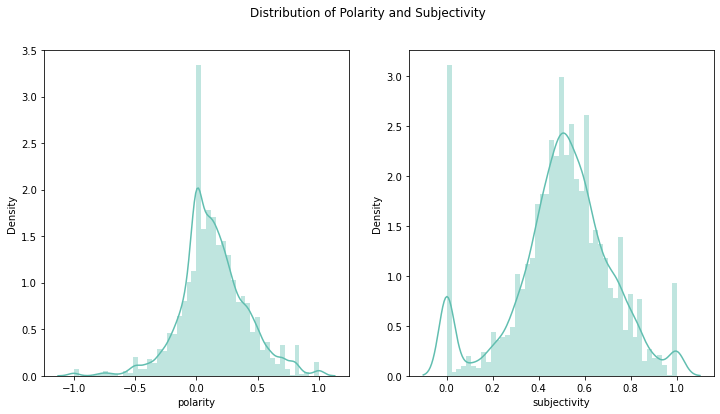

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(df_processed_full['polarity'], color='#61BEB0')

plt.subplot(1, 2, 2)
sns.distplot(df_processed_full['subjectivity'], color='#61BEB0')

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

<font color=#61BEB0>**Relation between Polarity and Subjectivity:**</font>

C:\Users\peace\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


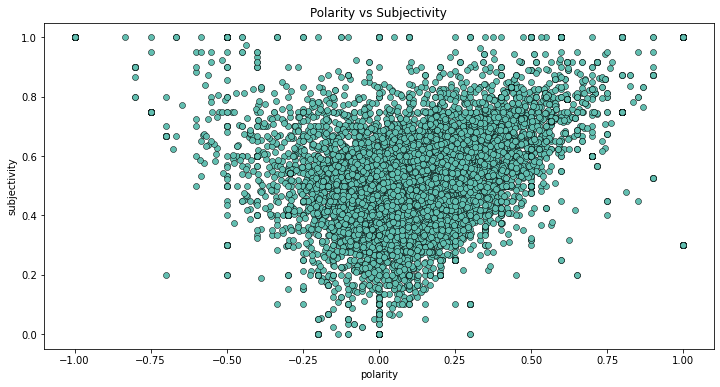

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(df_processed_full['polarity'], df_processed_full['subjectivity'], color='#61BEB0', edgecolor='black')
plt.title('Polarity vs Subjectivity')
plt.show()

#### <font color=#FFB703> **Visualising Most Frequent Words** </font>

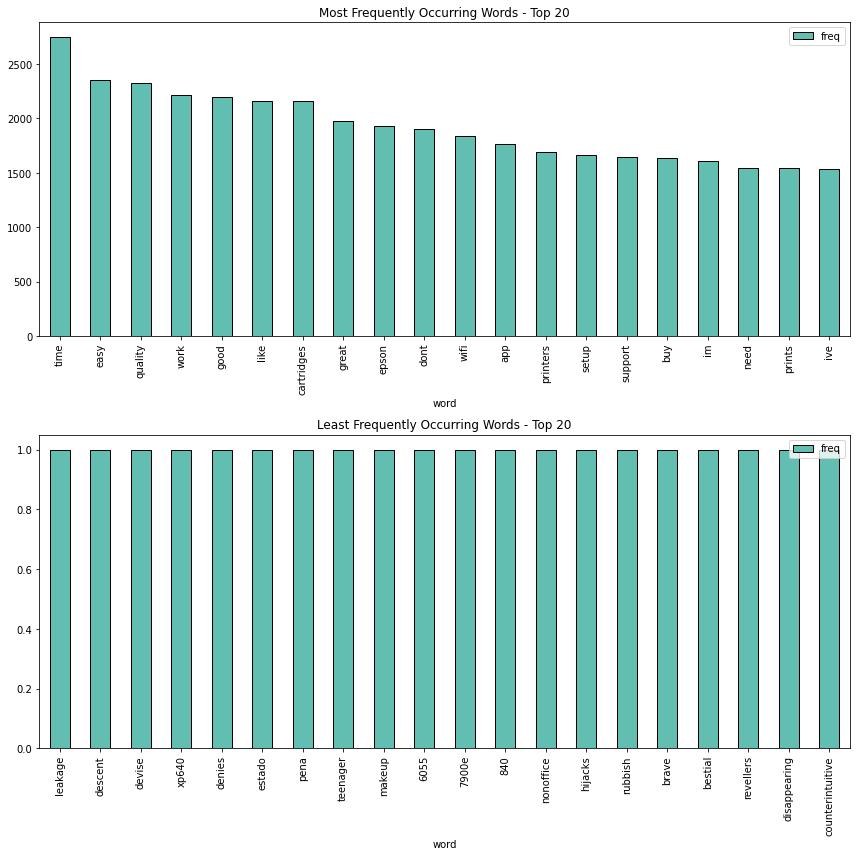

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df_processed_full['Review Content'])
sum_words = words.sum(axis=0)

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot the most frequently occurring words (top 20)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(20).plot(x='word', y='freq', kind='bar', ax=axes[0], color='#61BEB0', edgecolor='black')
axes[0].set_title("Most Frequently Occurring Words - Top 20")

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.tail(20).plot(x='word', y='freq', kind='bar', ax=axes[1], color='#61BEB0', edgecolor='black')
axes[1].set_title("Least Frequently Occurring Words - Top 20")

plt.tight_layout()
plt.show()

#### <font color=#FFB703> **Visualising nGrams** </font>

In [15]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<font color=#61BEB0>**Top Unigrams:**</font>

In [16]:
text = str(df_processed_full['Review Content'])
tokenized = text.split()

# and get a list of all the bi-grams
esBigrams = ngrams(tokenized, 1)

# get the frequency of each bigram in our corpus
esBigramFreq = collections.Counter(esBigrams)

esBigramFreq.most_common(10)

[(('can',), 5),
 (('...',), 3),
 (('0',), 1),
 (('easy',), 1),
 (('install',), 1),
 (('works',), 1),
 (('great',), 1),
 (('1',), 1),
 (('slower',), 1),
 (('speed',), 1)]

<font color=#61BEB0>**Top Bigrams:**</font>

In [17]:
text = str(df_processed_full['Review Content'])
tokenized = text.split()

# and get a list of all the bi-grams
esBigrams = ngrams(tokenized, 2)

# get the frequency of each bigram in our corpus
esBigramFreq = collections.Counter(esBigrams)

esBigramFreq.most_common(10)

[(('0', 'easy'), 1),
 (('easy', 'install'), 1),
 (('install', 'works'), 1),
 (('works', 'great'), 1),
 (('great', '1'), 1),
 (('1', 'slower'), 1),
 (('slower', 'speed'), 1),
 (('speed', 'im'), 1),
 (('im', 'used'), 1),
 (('used', 'old'), 1)]

<font color=#61BEB0>**Top Trigrams:**</font>

In [18]:
text = str(df_processed_full['Review Content'])
tokenized = text.split()

# and get a list of all the bi-grams
esTrigrams = ngrams(tokenized, 3)

# get the frequency of each bigram in our corpus
esTrigramFreq = collections.Counter(esTrigrams)

esTrigramFreq.most_common(10)

[(('0', 'easy', 'install'), 1),
 (('easy', 'install', 'works'), 1),
 (('install', 'works', 'great'), 1),
 (('works', 'great', '1'), 1),
 (('great', '1', 'slower'), 1),
 (('1', 'slower', 'speed'), 1),
 (('slower', 'speed', 'im'), 1),
 (('speed', 'im', 'used'), 1),
 (('im', 'used', 'old'), 1),
 (('used', 'old', 'model'), 1)]

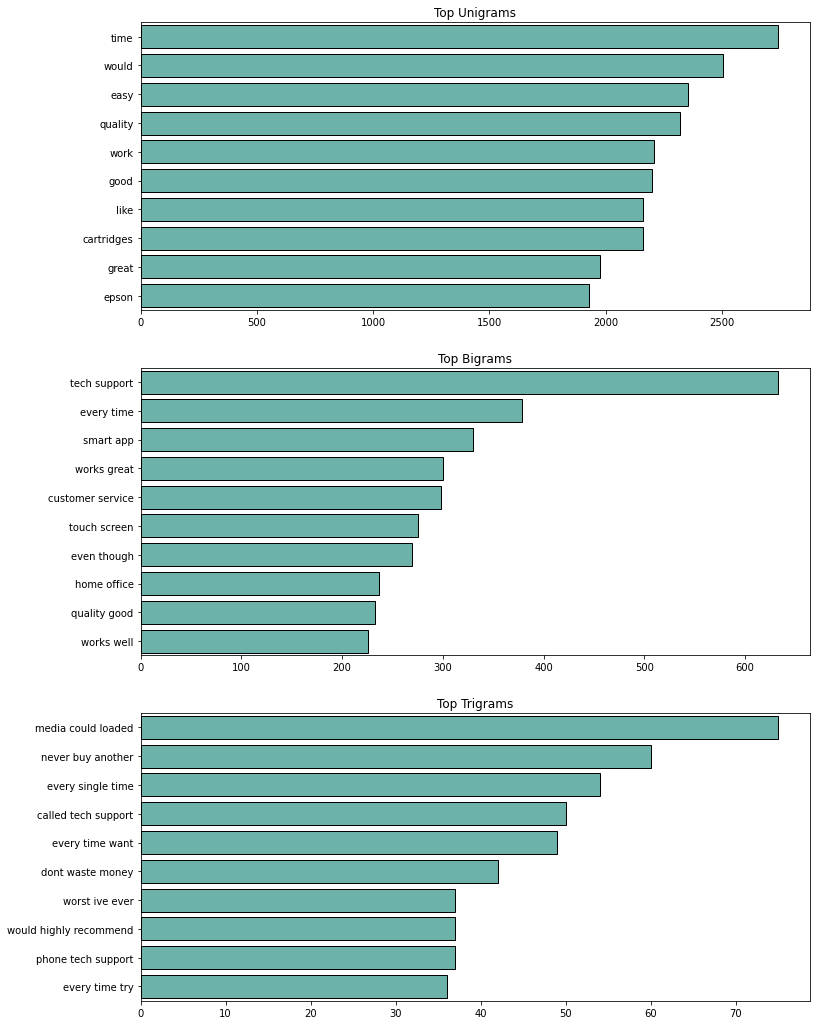

In [43]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

top_unigrams = get_top_ngram(df_processed_full['Review Content'], 1)[:10]
x, y = map(list, zip(*top_unigrams))
sns.barplot(x=y, y=x, ax=axes[0], color='#61BEB0', edgecolor='black')
axes[0].set_title("Top Unigrams")

top_bigrams = get_top_ngram(df_processed_full['Review Content'], 2)[:10]
x, y = map(list, zip(*top_bigrams))
sns.barplot(x=y, y=x, ax=axes[1], color='#61BEB0', edgecolor='black')
axes[1].set_title("Top Bigrams")

top_trigrams = get_top_ngram(df_processed_full['Review Content'], 3)[:10]
x, y = map(list, zip(*top_trigrams))
sns.barplot(x=y, y=x, ax=axes[2], color='#61BEB0', edgecolor='black')
axes[2].set_title("Top Trigrams")

plt.show()

#### <font color=#FFB703> **Word Cloud** </font>

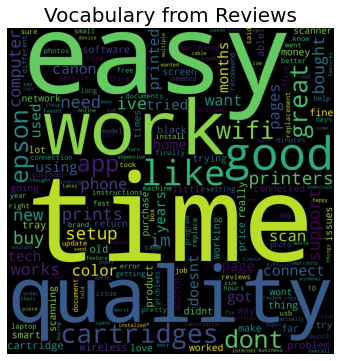

In [20]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df_processed_full['Review Content'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(12, 6))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

#### <font color=#FFB703> **Counts** </font>

<font color=#61BEB0>**Character Count:**</font>

In [21]:
df_processed_full['char_count'] = df_processed_full['Review Content'].apply(len)

<font color=#61BEB0>**Word Count:**</font>

In [22]:
df_processed_full['word_count'] = df_processed_full['Review Content'].apply(lambda x: len(x.split()))

<font color=#61BEB0>**Word Density:**</font>

In [23]:
df_processed_full['word_density'] = df_processed_full['char_count'] / (df_processed_full['word_count']+1)

<font color=#61BEB0>**Summarised:**</font>

In [24]:
df_processed_full[['char_count','word_count','word_density']].describe()

,char_count,word_count,word_density
count,10209.000000,10209.000000,10209.000000
mean,251.005975,37.712802,6.060142
std,311.415235,45.939257,0.964251
min,1.000000,1.000000,0.500000
25%,68.000000,11.000000,5.714286
50%,154.000000,23.000000,6.253521
75%,315.000000,47.000000,6.652174
max,4439.000000,643.000000,10.357143


#### <font color=#FFB703> **Distribution Plots** </font>

<font color=#61BEB0>**Average number of token words (by positive / negative rating):**</font>

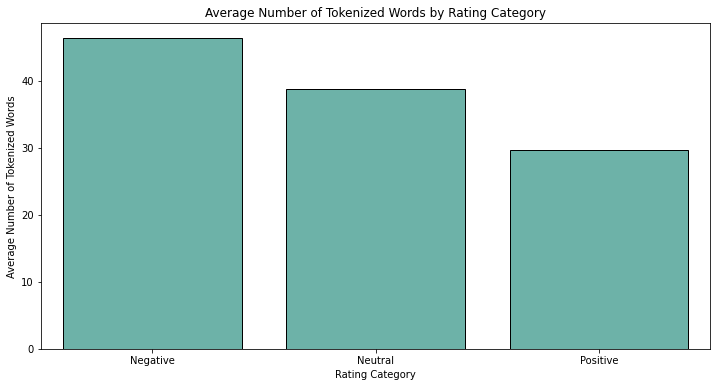

In [25]:
df_processed_full['Avg Token Words'] = df_processed_full['Tokenized Content'].apply(len)
overall_avg = df_processed_full.groupby('Rating Category')['Avg Token Words'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x = 'Rating Category', y = 'Avg Token Words', data = overall_avg, color='#61BEB0', edgecolor='black')
plt.title('Average Number of Tokenized Words by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Average Number of Tokenized Words')
plt.show()

<font color=#61BEB0>**Average number of characters:**</font>

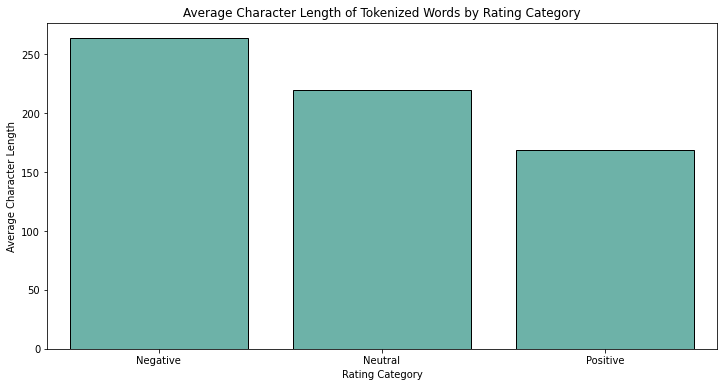

In [26]:
df_processed_full['Avg Char Length'] = df_processed_full['Tokenized Content'].apply(lambda x: sum(len(word) for word in x))

avg_lengths = df_processed_full.groupby('Rating Category')['Avg Char Length'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Rating Category', y='Avg Char Length', data=avg_lengths, color = '#61BEB0', edgecolor = 'black')
plt.title('Average Character Length of Tokenized Words by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Average Character Length')
plt.show()

<font color=#61BEB0>**Overall Rating Distribution:**</font>

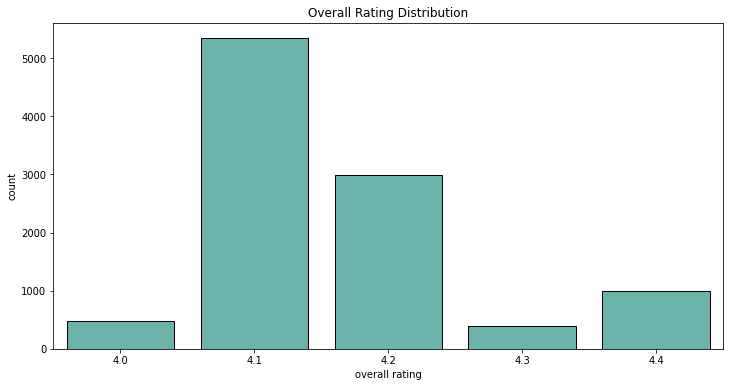

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='overall rating', data=df_processed_full, color = '#61BEB0', edgecolor = 'black')
plt.title('Overall Rating Distribution')
plt.show()

<font color=#61BEB0>**Review Distribution:**</font>

In [28]:
df_processed_full["Review rating"].value_counts()

5    3011
1    2663
4    1642
2    1473
3    1420
Name: Review rating, dtype: int64

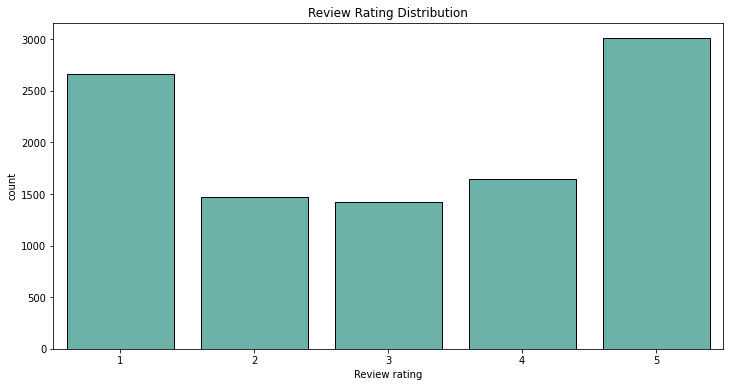

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Review rating', data=df_processed_full, color = '#61BEB0', edgecolor = 'black')
plt.title('Review Rating Distribution')
plt.show()

<AxesSubplot:xlabel='Review rating'>

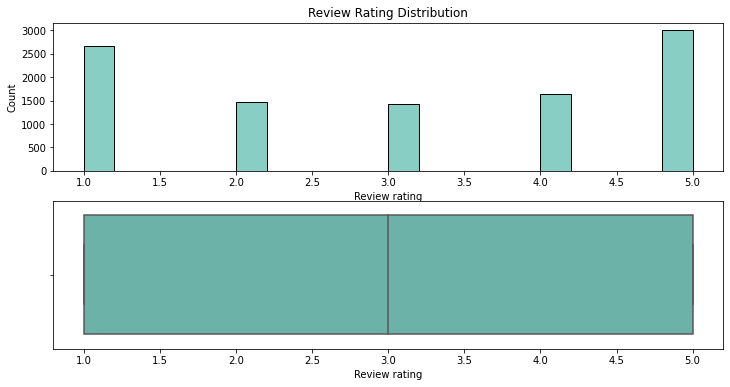

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.histplot(df_processed_full['Review rating'], bins=20, kde=False, color = '#61BEB0', edgecolor= 'black')
plt.title('Review Rating Distribution')
plt.subplot(2, 1, 2)
sns.boxplot(x='Review rating', data=df_processed_full, color = '#61BEB0')

<font color=#61BEB0>**Rating Count Distribution:**</font>

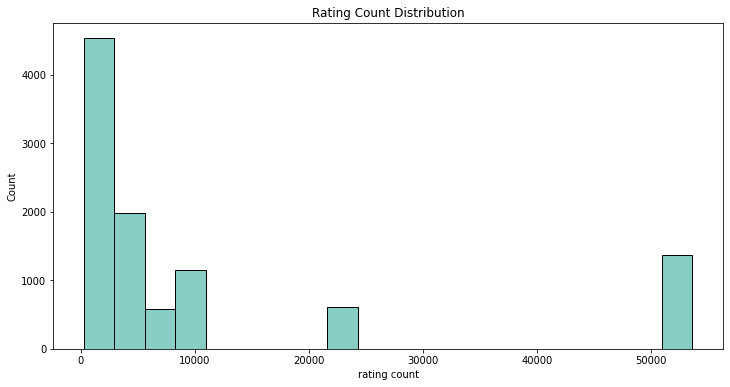

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed_full['rating count'], bins=20, kde=False, color = '#61BEB0')
plt.title('Rating Count Distribution')
plt.show()

<font color=#61BEB0>**Word Distribution:**</font>

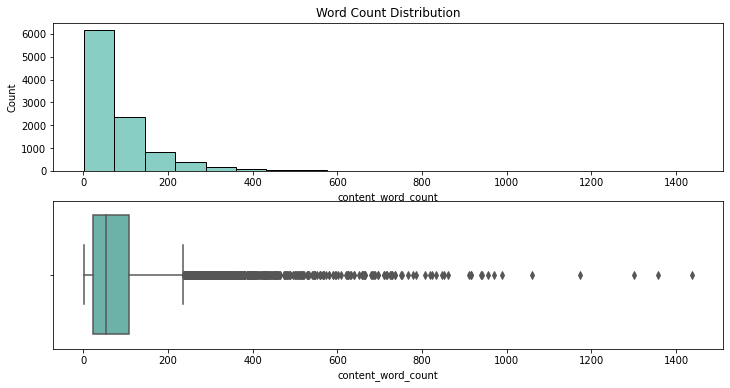

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.histplot(df_processed_full['content_word_count'], bins=20, kde=False, color = '#61BEB0')
plt.title('Word Count Distribution')
plt.subplot(2, 1, 2)
sns.boxplot(x='content_word_count', data=df_processed_full, color = '#61BEB0')
plt.show()

<font color=#61BEB0>**Verified Purchase Distribution:**</font>

C:\Users\peace\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\peace\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


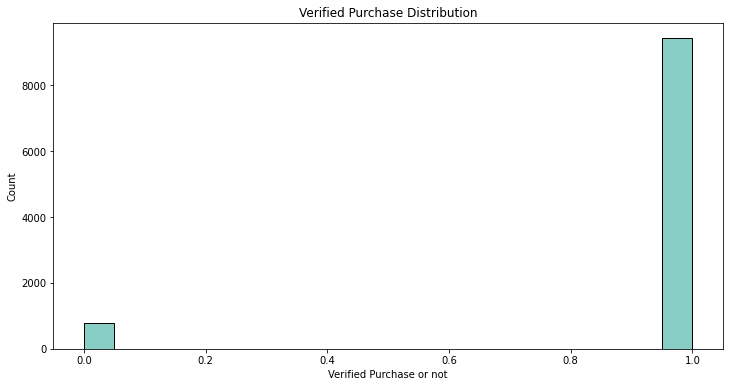

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed_full['Verified Purchase or not'], bins=20, kde=False, color = '#61BEB0')
plt.title('Verified Purchase Distribution')
plt.show()

<font color=#61BEB0>**Vine or Not Distribution:**</font>

C:\Users\peace\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
C:\Users\peace\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


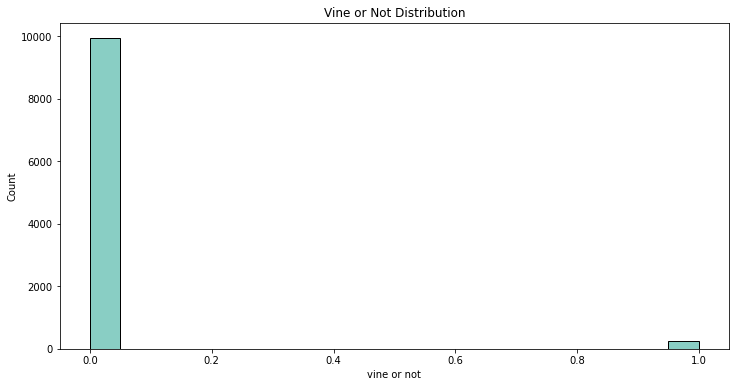

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed_full['vine or not'], bins=20, kde=False, color = '#61BEB0')
plt.title('Vine or Not Distribution')
plt.show()

<font color=#61BEB0>**Review Date Distribution:**</font>

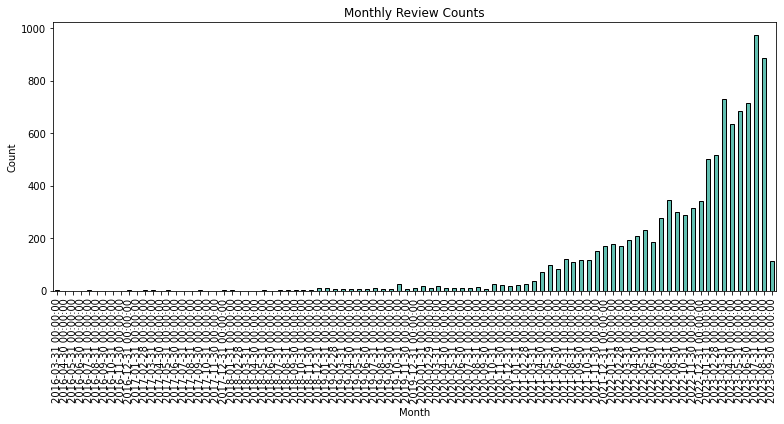

In [35]:
df_processed_full['Review date'] = pd.to_datetime(df_processed_full['Review date'])
df_time = df_processed_full.set_index('Review date')
monthly_counts = df_time.resample('M').size()

plt.figure(figsize=(11, 6))
monthly_counts.plot(kind='bar', color = '#61BEB0', edgecolor = 'black')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Review Counts')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<font color=#61BEB0>**Correlation Heatmap:**</font>

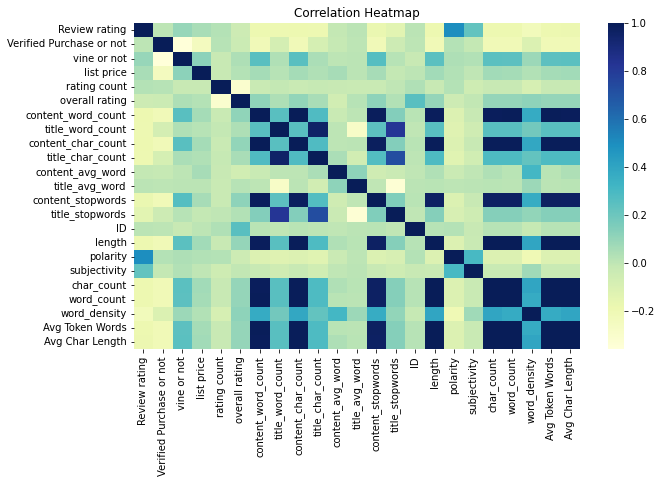

In [36]:
correlation_matrix = df_processed_full.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu') # Change annot to True to see values
plt.title('Correlation Heatmap')
plt.show()

<font color=#61BEB0>**People Find Helpful Distribution:**</font>

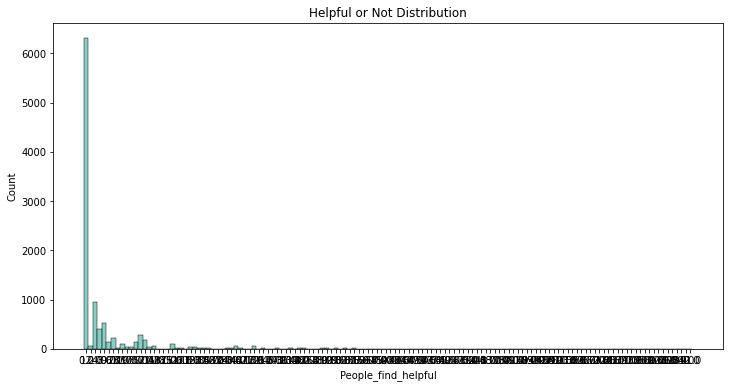

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed_full['People_find_helpful'], bins=20, kde=False, color = '#61BEB0')
plt.title('Helpful or Not Distribution')
plt.show()

<font color=#61BEB0>**List Price Distribution:**</font>

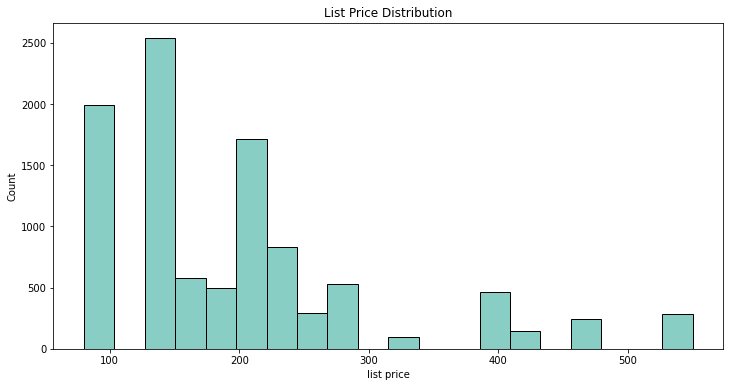

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(df_processed_full['list price'], bins=20, kde=False, color = '#61BEB0')
plt.title('List Price Distribution')
plt.show()